<a href="https://colab.research.google.com/github/Tomas-Ausensi/Entregables_MAT281/blob/master/docs/homeworks/T2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/homeworks/h1/hw_01.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea N°02


## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Tomás Ausensi Ramos

* __Rol__: 202010511-1

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
   
4.- Esta Tarea debe ser entregada en **Dos Jupyter Notebooks Distinto**.
   * **Ejemplo**: `hw_02_part_01.ipynb`, `hw_02_part_02.ipynb`.

## II.- Titanic - Machine Learning from Disaster


<img src="https://drive.google.com/uc?export=view&id=1dsHUmSqyCYvez1LRlieo_y06haGL6t9r" width = "300" align="center"/>



### Hints

* Esto corresponde a un desafio de Kaggle ([link](https://www.kaggle.com/competitions/titanic/overview/description)).
* La información respecto a los datos, lo pueden encontrar en el siguiente [link](https://www.kaggle.com/competitions/titanic/data).
* A modo de inspiración, pueden ocupar algunos gráficos de otros participantes del desafío ([link](https://www.kaggle.com/competitions/titanic/code)).

##Librerías

In [1]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Scikit learn
import sklearn.preprocessing as skp
#Scikit scalers, encoders and transformers
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#Scikit model and feature selection
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import svm
# Scikit Metrics
from sklearn.metrics import log_loss, classification_report,roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
# Scikit pipelines
from sklearn.pipeline import make_pipeline, make_union
from sklearn.pipeline import Pipeline, FeatureUnion
#Scikit Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Data manipulation libraries
import pandas as pd
import numpy as np
# General use
import os
from tqdm.notebook import tqdm
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

In [2]:
train_url = 'https://raw.githubusercontent.com/Tomas-Ausensi/Entregables_MAT281/master/docs/data/datasets_tarea_2/train.csv'
test_url = 'https://raw.githubusercontent.com/Tomas-Ausensi/Entregables_MAT281/master/docs/data/datasets_tarea_2/test.csv'

##Datasets

In [3]:
test_df = pd.read_csv(test_url)
train_df = pd.read_csv(train_url)

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Como se puede a apreciar, hay datos tanto categóricos como numéricos. Además, hay algunas columnas con datos nulos. La idea sera ver que hacer con estos datos.
Otra cosa interesante: para poder aplicar al conjunto de pruebas, habrá que eliminar algunas columnas. Por ejemplo, el nombre de una persona es un dato único que no podremos encontrar en el conjunto test. Lo mismo ocurre con la cabina

##Reemplazando valores nulos

In [6]:
for col in train_df.columns:
  print(f"Number of Unique values for the column {col}:\n{train_df[col].nunique()}" )

Number of Unique values for the column PassengerId:
891
Number of Unique values for the column Survived:
2
Number of Unique values for the column Pclass:
3
Number of Unique values for the column Name:
891
Number of Unique values for the column Sex:
2
Number of Unique values for the column Age:
88
Number of Unique values for the column SibSp:
7
Number of Unique values for the column Parch:
7
Number of Unique values for the column Ticket:
681
Number of Unique values for the column Fare:
248
Number of Unique values for the column Cabin:
147
Number of Unique values for the column Embarked:
3


In [7]:
train_df2 = train_df.copy()
train_df2 = train_df2.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

In [8]:
numerical_cols = [col for col in train_df2.columns
                if train_df2[col].dtype in ['int64', 'float64']
                and col != 'Survived']
categorical_cols = [col for col in train_df2.columns
                if train_df2[col].dtype == 'object']

In [9]:
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [10]:
categorical_cols

['Sex', 'Embarked']

In [11]:
for col in categorical_cols:
  train_df2[col].fillna(value = train_df[col].mode()[0], inplace = True)

for col in numerical_cols:
  train_df2[col].fillna(value = train_df[col].std(), inplace = True)

In [12]:
nan_percentage_per_column = (train_df2.isna().sum() / len(train_df2)) * 100
nan_percentage_per_column

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

Lo mismo se debe hacer para el conjunto de pruebas

In [13]:
test_df2 = test_df.copy()
test_df2 = test_df2.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

In [14]:
nan_percentage_per_column = (test_df2.isna().sum() / len(test_df2)) * 100
nan_percentage_per_column

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Embarked     0.000000
dtype: float64

In [15]:
for col in categorical_cols:
  test_df2[col].fillna(value = test_df2[col].mode()[0], inplace = True)

for col in numerical_cols:
  test_df2[col].fillna(value = test_df2[col].std(), inplace = True)

In [16]:
nan_percentage_per_column = (test_df2.isna().sum() / len(test_df2)) * 100
nan_percentage_per_column

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

##Visualizaciones

Veamos como se comportan los datos categóricos

In [17]:
categorical_cols2 = categorical_cols.copy()
categorical_cols2.append('Pclass')

In [18]:
categorical_cols2

['Sex', 'Embarked', 'Pclass']

In [19]:
gr = train_df.groupby(['Survived', 'Pclass']).size().unstack(level=1)

In [20]:
gr

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


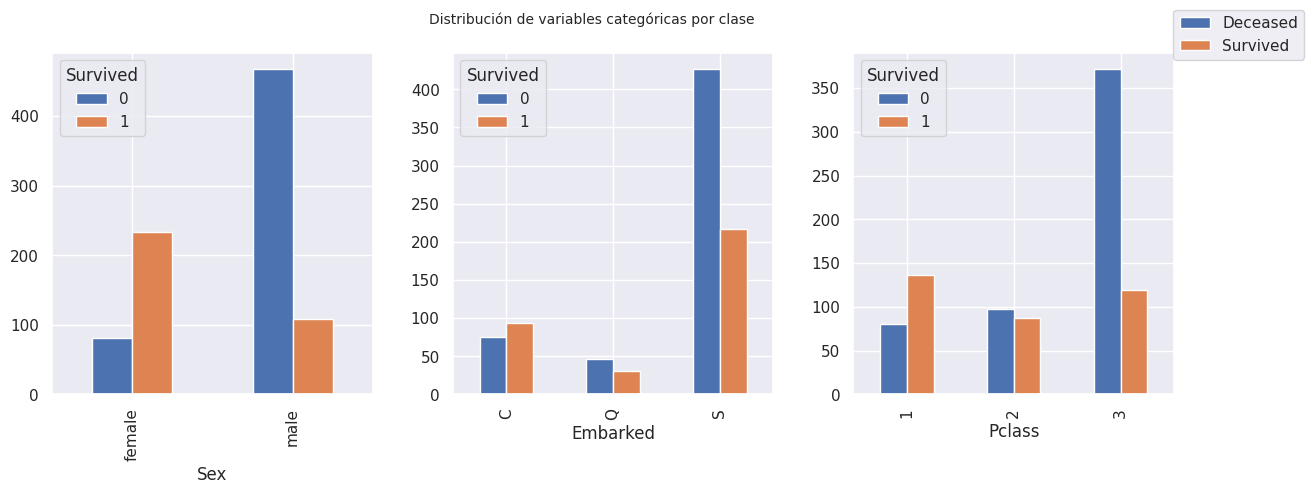

In [21]:
fig, axes = plt.subplots(nrows=1, ncols = 3, figsize=(12,5))
for index, col in enumerate(categorical_cols2):
  gr = train_df.groupby([col, 'Survived']).size().unstack(level=1)
  gr.plot(kind='bar', ax = axes[index%3])
  #sns.barplot(data = gr, x= col, y= 'Survived', ax = axes[index%3])

fig.suptitle('Distribución de variables categóricas por clase', fontsize=10)
legend_labels = ['Deceased', 'Survived']
fig.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.10, 1))
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
plt.show()


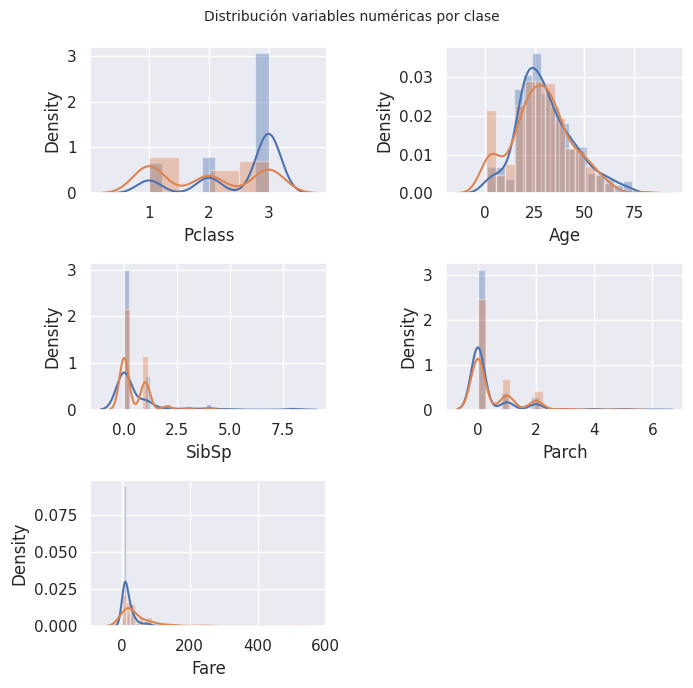

In [22]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(7,7))

for index, col in enumerate(numerical_cols):
  for status in train_df['Survived'].unique():
    target = train_df.loc[train_df['Survived'] == status]
    sns.distplot(target[col], hist = True, rug= False, kde = True,
                 ax = axes[index//2, index%2], label = status)

axes[-1,-1].axis('off')
fig.suptitle('Distribución variables numéricas por clase', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

##Data split

Como los datos ya vienen separados en un train y test set, no es necesario hacer train_test_split. Esto nos permitirá mejorar un poco los resultados de las métricas de cada modelo, al utilizar el train set completo.

In [24]:
X_train = train_df2.drop('Survived', axis=1)
y_train = train_df2['Survived']


##Model Selection

In [25]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('RandomForest', RandomForestClassifier(criterion= 'entropy'))
]

In [26]:
param_grids = {
    'LogisticRegression' : {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']
},
    'KNN' : {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2]
},
    'RandomForest' : {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
}

Ahora, como se tienen columnas de distintos tipos, hay que crear varios transformers

In [27]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop = 'if_binary')

preprocessor = ColumnTransformer(
    transformers = [
        ('numerical transformer', numerical_transformer, numerical_cols),
        ('categorical transformer', categorical_transformer, categorical_cols)
    ],
    remainder = 'passthrough', verbose_feature_names_out = False
)

In [28]:
#Esta celda es para ver la transformación aplicada
transformed_data = preprocessor.fit_transform(train_df2)
feature_names = preprocessor.get_feature_names_out()
dataset = pd.DataFrame(transformed_data, columns = feature_names)
columns_to_move = ['Survived']
dataset = dataset[columns_to_move + [col for col in dataset if col not in columns_to_move]]
dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.827377,-0.326811,0.432793,-0.473674,-0.502445,1.0,0.0,0.0,1.0
1,1.0,-1.566107,0.789292,0.432793,-0.473674,0.786845,0.0,1.0,0.0,0.0
2,1.0,0.827377,-0.047785,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,1.0
3,1.0,-1.566107,0.580022,0.432793,-0.473674,0.420730,0.0,0.0,0.0,1.0
4,0.0,0.827377,0.580022,-0.474545,-0.473674,-0.486337,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,-0.369365,0.021971,-0.474545,-0.473674,-0.386671,1.0,0.0,0.0,1.0
887,1.0,-1.566107,-0.536080,-0.474545,-0.473674,-0.044381,0.0,0.0,0.0,1.0
888,0.0,0.827377,-0.848135,0.432793,2.008933,-0.176263,0.0,0.0,0.0,1.0
889,1.0,-1.566107,-0.047785,-0.474545,-0.473674,-0.044381,1.0,1.0,0.0,0.0


In [29]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
}

Debido a que son pocos datos en el train set (891), es posible usar `GridSearchCV` con una cantidad considerable de hiperparámetros

In [30]:
results_df = pd.DataFrame(columns=['Model'] + list(scoring.keys()))
best_models = {}
for model_name, model in models:
    pipeline = Pipeline([
        ('preprocesor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='accuracy', cv=5, verbose = 4)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_


    cv_results = cross_validate(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=scoring)

    results_df = results_df.append({
      'Model': model_name,
      **{metric: cv_results[f'test_{metric}'].mean() for metric in scoring}
    }, ignore_index=True)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END model__C=0.001, model__penalty=l1, model__solver=liblinear;, score=0.615 total time=   0.0s
[CV 2/5] END model__C=0.001, model__penalty=l1, model__solver=liblinear;, score=0.618 total time=   0.0s
[CV 3/5] END model__C=0.001, model__penalty=l1, model__solver=liblinear;, score=0.618 total time=   0.0s
[CV 4/5] END model__C=0.001, model__penalty=l1, model__solver=liblinear;, score=0.618 total time=   0.0s
[CV 5/5] END model__C=0.001, model__penalty=l1, model__solver=liblinear;, score=0.612 total time=   0.0s
[CV 1/5] END model__C=0.001, model__penalty=l1, model__solver=saga;, score=0.615 total time=   0.0s
[CV 2/5] END model__C=0.001, model__penalty=l1, model__solver=saga;, score=0.618 total time=   0.0s
[CV 3/5] END model__C=0.001, model__penalty=l1, model__solver=saga;, score=0.618 total time=   0.0s
[CV 4/5] END model__C=0.001, model__penalty=l1, model__solver=saga;, score=0.618 total time=   0.0s
[CV 5/5] END 

In [32]:
results_df

,Model,accuracy,precision,recall,f1
0,LogisticRegression,0.797991,0.796547,0.797991,0.795227
1,KNN,0.812604,0.813226,0.812604,0.811820
2,RandomForest,0.826075,0.826925,0.826075,0.822803
